## 1.Importing Required Package

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

## 2.Load the dataset into tool

In [8]:
df = pd.read_csv('C:/Users/Win 10/Downloads/Mall_Customers.csv',encoding="Latin-1")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


## 3.Perform below vizulaitions

## 3.1 Univariate Analysis

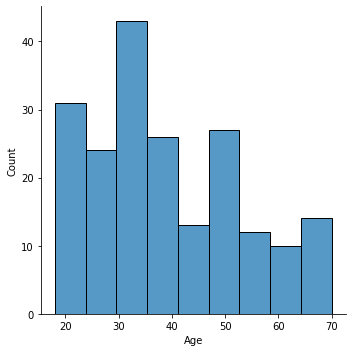

In [10]:
sns.displot(df.Age)

## 3.2 Bi- Variate Analysis

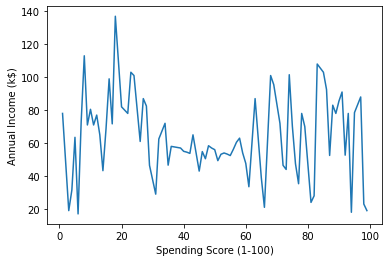

In [19]:
sns.lineplot(x="Spending Score (1-100)", y="Annual Income (k$)", data =df, ci=None)
plt.show()

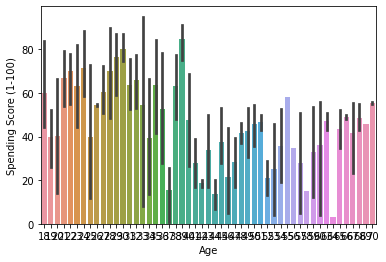

In [21]:
sns.barplot(x="Age", y="Spending Score (1-100)", data=df)
plt.show()

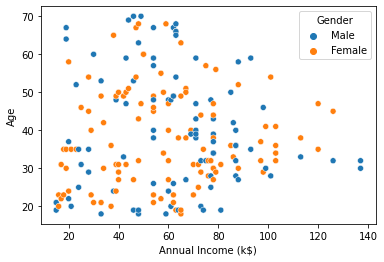

In [18]:
sns.scatterplot(x="Annual Income (k$)", y="Age", hue ="Gender", data=df)
plt.show()

## 3.3. Multi-variate Analysis

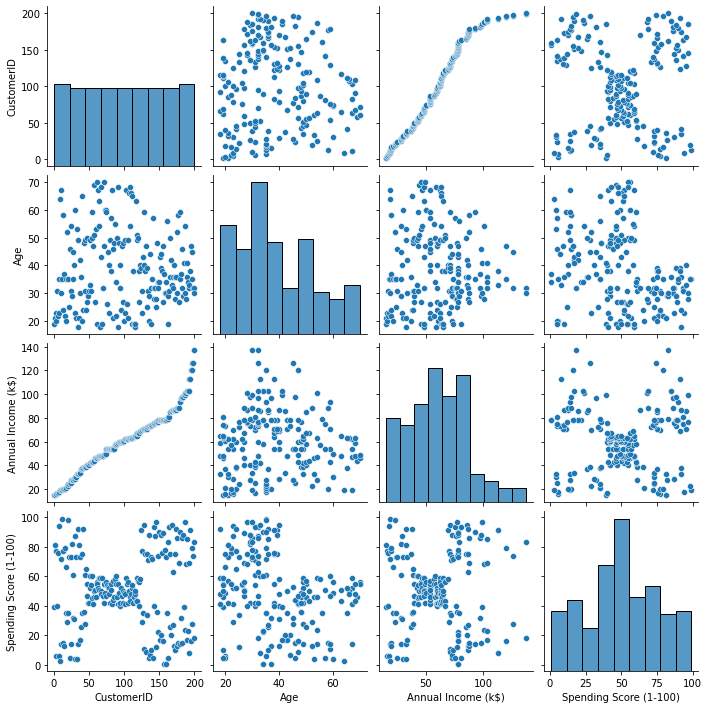

In [22]:
sns.pairplot(df)

## 4.Perform descriptive statistics on the dataset.

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [24]:
df.describe(include="all")

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [66]:
df.drop('CustomerID',axis=1,inplace=True)
df.head()

,Gender,Age,Income,Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## 5. Check for the missing values and deal with them

In [25]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [67]:
#Rename the column names
print(df.columns)

Index(['Gender', 'Age', 'Income', 'Score'], dtype='object')


In [70]:
df.columns=['Gender','Age','Income','Score']
df.head()

,Gender,Age,Income,Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## 6.Find the outliers and replace them outliers

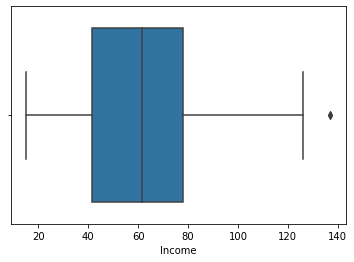

In [39]:
sns.boxplot(x=df['Income'])
plt.show()

In [40]:
q1=df.Income.quantile(0.25)
q3=df.Income.quantile(0.75)

In [41]:
IQR=q3-q1

In [42]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [44]:
df['Income']=np.where(df['Income']>upper_limit, upper_limit, np.where(df['Income']<lower_limit, lower_limit, df['Income']))

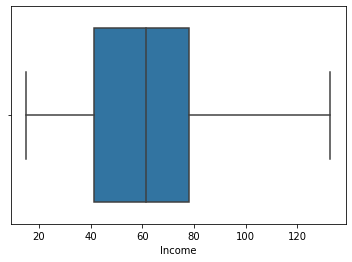

In [46]:
sns.boxplot(x=df['Income'])
plt.show()

## 7. Check for Categorical columns and perform encoding.

In [48]:
from sklearn.preprocessing import LabelEncoder

In [71]:
encoder=LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df.head()

,Gender,Age,Income,Score
0,1,19,15.0,39
1,1,21,15.0,81
2,0,20,16.0,6
3,0,23,16.0,77
4,0,31,17.0,40


## 8. Scaling the data

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(df)
x[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

## 9. Perform any of the clustering algorithms

In [73]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(x)
res

array([1, 1, 6, 6, 6, 6, 0, 6, 4, 6, 4, 6, 0, 6, 2, 1, 6, 1, 4, 6, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 6, 4, 6, 4, 1, 0, 6, 0, 6, 0, 6, 0, 1, 4, 6,
       0, 6, 0, 6, 6, 6, 0, 1, 6, 4, 0, 4, 0, 4, 6, 4, 4, 1, 0, 0, 4, 1,
       0, 0, 1, 6, 4, 0, 0, 0, 4, 1, 0, 1, 6, 0, 4, 1, 4, 0, 6, 4, 0, 6,
       6, 0, 0, 1, 4, 0, 6, 1, 0, 6, 4, 1, 6, 0, 4, 1, 4, 6, 0, 4, 4, 4,
       4, 6, 3, 1, 6, 6, 0, 0, 0, 0, 1, 3, 7, 5, 3, 7, 2, 5, 4, 5, 2, 5,
       3, 7, 2, 7, 3, 5, 2, 7, 3, 5, 3, 7, 2, 5, 4, 7, 3, 5, 2, 5, 3, 7,
       3, 7, 2, 7, 2, 7, 0, 7, 2, 7, 2, 7, 2, 7, 3, 5, 2, 5, 2, 5, 3, 7,
       4, 5, 4, 5, 3, 7, 2, 7, 3, 5, 3, 5, 3, 7, 3, 7, 2, 7, 3, 7, 3, 5,
       2, 5])

In [74]:
data1 = pd.DataFrame(x, columns = df.columns)
data1.head()

,Gender,Age,Income,Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


## 10. Add the cluster data with the primary dataset

In [75]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Income,Score,kclus
0,1.0,0.019231,0.000000,0.387755,1
1,1.0,0.057692,0.000000,0.816327,1
2,0.0,0.038462,0.008493,0.051020,6
3,0.0,0.096154,0.008493,0.775510,6
4,0.0,0.250000,0.016985,0.397959,6


In [76]:
data1['kclus'].unique()

array([1, 6, 0, 4, 2, 3, 7, 5])

In [77]:
data1['kclus'].value_counts()

0    37
6    34
4    29
1    24
7    22
3    19
5    18
2    17
Name: kclus, dtype: int64

## 11. Split the data into dependent and independent variables

In [78]:
ind=data1.iloc[:,0:4]
ind.head()

,Gender,Age,Income,Score
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [86]:
dep=data1.iloc[:,4]
dep.head()

0    1
1    1
2    6
3    6
4    6
Name: kclus, dtype: int32

## 12. Split the data into training and testing

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Income,Score
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [88]:
x_test.head()

,Gender,Age,Income,Score
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [89]:
y_train.head()

116    0
67     0
78     6
42     4
17     1
Name: kclus, dtype: int32

In [90]:
y_test.head()

58     6
40     0
34     0
102    4
184    3
Name: kclus, dtype: int32

## 13. Build the Model

In [92]:
from sklearn.linear_model import LinearRegression

## 14. Train the Model

In [93]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

## 15. Test the Model

In [105]:
predi_test = lr.predict(x_test)
predi_test

array([3.60022973, 1.80844747, 1.40963847, 2.56032222, 4.10023627,
       3.85548732, 3.45893402, 2.40409609, 4.52573983, 3.53428504,
       4.79566069, 0.99424043, 4.36017901, 3.08800086, 2.40062428,
       3.17802104, 5.05270251, 4.47364134, 2.28699498, 2.11072857,
       3.04365507, 2.22057692, 2.03518822, 3.49700269, 4.12667057,
       2.50356526, 2.27669663, 2.14152229, 6.30378141, 2.68009555,
       3.31663901, 5.12675269, 3.66193877, 4.64255589, 1.94029147,
       3.90858373, 2.63836604, 2.95818945, 3.374368  , 2.35210489,
       2.01005286, 2.49907926, 5.90913302, 0.78774388, 2.8546318 ,
       4.42385451, 4.21095604, 4.39394009, 5.78637924, 3.54555932,
       2.47897653, 4.59874344, 3.68436644, 2.35045108, 4.33175477,
       5.262187  , 5.90693288, 2.90547951, 6.13342654, 2.50326982])

## 16. Measure the performance using Evaluation Metrics.

In [106]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(predi_test,y_test)
print("The Mean squared error is: ", mse)

The Mean squared error is:  3.869182291949448


In [107]:
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)

The Root mean squared error is:  1.9670237141299156


In [108]:
mae = mean_absolute_error(predi_test,y_test)
print("The Mean absolute error is: ", mae)

The Mean absolute error is:  1.7310408233167252


In [109]:
from sklearn.metrics import accuracy_score
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The accuracy is:  0.30945137816578194
